Loading dataset...
Using Colab cache for faster access to the 'flight-delays' dataset.
Data preparation complete.
                            OLS Regression Results                            
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 2.376e+07
Date:                Fri, 16 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:41:16   Log-Likelihood:            -2.1650e+07
No. Observations:             5714008   AIC:                         4.330e+07
Df Residuals:                 5714004   BIC:                         4.330e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------

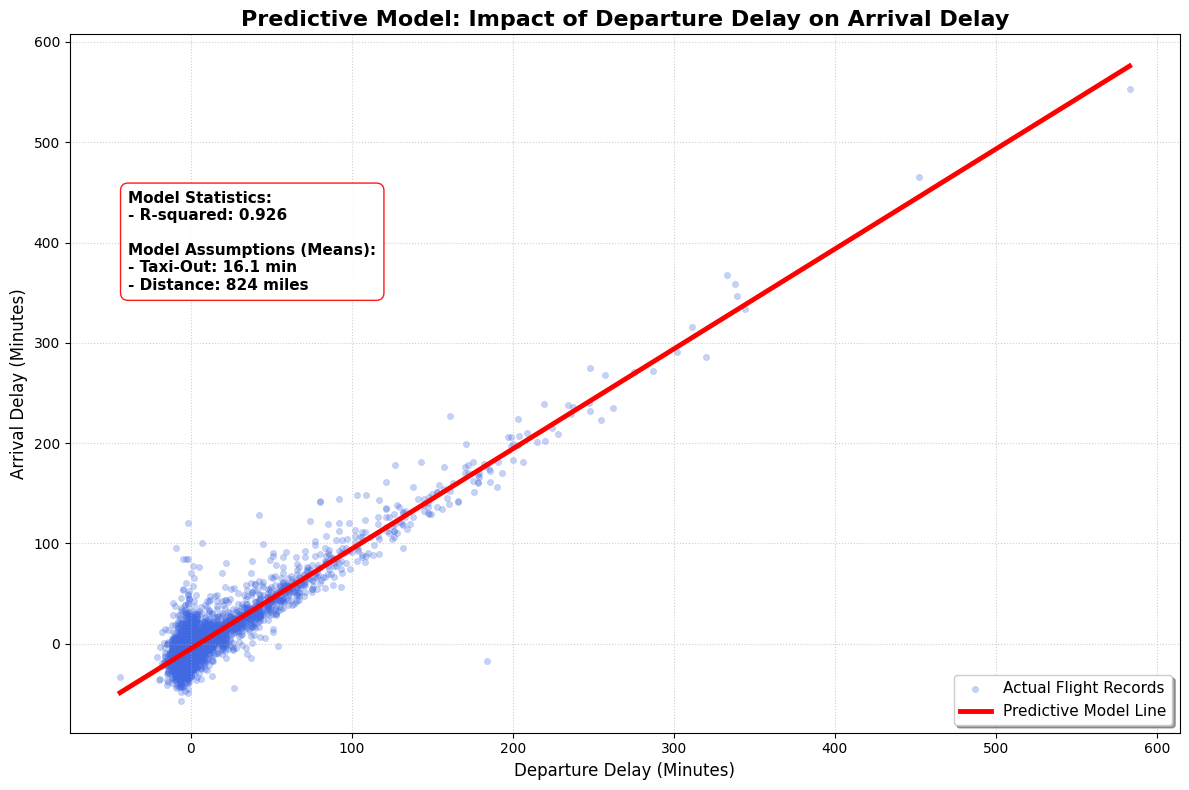

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import glob

# --- 1. DATA ACQUISITION & PREPARATION ---
try:
    print("Loading dataset...")
    path = kagglehub.dataset_download("usdot/flight-delays")
    csv_path = glob.glob(os.path.join(path, "**/flights.csv"), recursive=True)[0]

    # Loading only the specific columns required for the regression model
    cols = ['DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE', 'ARRIVAL_DELAY']
    df_rq3 = pd.read_csv(csv_path, usecols=cols, low_memory=False)

    # Cleaning: Removing missing values (NaNs) is mandatory for regression analysis
    df_rq3 = df_rq3.dropna()
    print("Data preparation complete.")

except Exception as e:
    print(f"An error occurred: {e}")

# --- 2. MODEL CONSTRUCTION ---
# Independent Variables (X) and Dependent Variable (y)
X = df_rq3[['DEPARTURE_DELAY', 'TAXI_OUT', 'DISTANCE']]
y = df_rq3['ARRIVAL_DELAY']

# Adding a constant (intercept) to the model
X = sm.add_constant(X)

# --- 3. REGRESSION ANALYSIS ---
# Fitting the Ordinary Least Squares (OLS) model
model_simple = sm.OLS(y, X).fit()

# Print the statistical summary table
print(model_simple.summary())

# --- 4. PREDICTIVE MODEL VISUALIZATION ---
# 1. Data Sampling (5,000 points for a clean visualization)
df_sample = df_rq3.sample(5000, random_state=42)

# 2. Model Coefficients (Extracted from the OLS results above)
intercept = model_simple.params['const']
coeff_dep = model_simple.params['DEPARTURE_DELAY']
coeff_taxi = model_simple.params['TAXI_OUT']
coeff_dist = model_simple.params['DISTANCE']

# 3. Statistical Assumptions
# Calculating means to fix secondary variables in the 2D plot
avg_taxi = df_rq3['TAXI_OUT'].mean()
avg_dist = df_rq3['DISTANCE'].mean()

# 4. Generate Data for the Prediction Line
# Define the X range (Departure Delay) based on the sample spread
x_range = np.linspace(df_sample['DEPARTURE_DELAY'].min(), df_sample['DEPARTURE_DELAY'].max(), 100)

# Regression Formula: Arrival_Delay = Const + (B1 * Dep_Delay) + (B2 * Avg_Taxi) + (B3 * Avg_Dist)
y_prediction = intercept + (coeff_dep * x_range) + (coeff_taxi * avg_taxi) + (coeff_dist * avg_dist)

# 5. Plotting
plt.figure(figsize=(12, 8))

# Actual Data Points (Blue)
sns.scatterplot(
    data=df_sample,
    x='DEPARTURE_DELAY',
    y='ARRIVAL_DELAY',
    alpha=0.3,
    color='royalblue',
    s=20,
    edgecolor=None,
    label='Actual Flight Records'
)

# Predictive Model Line (Red)
plt.plot(x_range, y_prediction, color='red', lw=3.5, label='Predictive Model Line')

# 6. Formatting & Labels (Titles kept as requested)
plt.title('Predictive Model: Impact of Departure Delay on Arrival Delay', fontsize=16, fontweight='bold')
plt.xlabel('Departure Delay (Minutes)', fontsize=12)
plt.ylabel('Arrival Delay (Minutes)', fontsize=12)

# Info Box (Positioned as per your instruction)
assumption_text = (
    f"Model Statistics:\n"
    f"- R-squared: {model_simple.rsquared:.3f}\n\n"
    f"Model Assumptions (Means):\n"
    f"- Taxi-Out: {avg_taxi:.1f} min\n"
    f"- Distance: {avg_dist:.0f} miles"
)

plt.text(x_range.min() + 5, df_sample['ARRIVAL_DELAY'].max() - 200,
         assumption_text, fontsize=11, fontweight='bold',
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='red', boxstyle='round,pad=0.5'))

# Legend (Lower Right)
plt.legend(fontsize=11, loc='lower right', frameon=True, shadow=True)

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()

# Render the final visual
plt.show()